In [52]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [53]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [54]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [55]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

# Data Description

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

The dataset contains the data of Insurance Claims. On the basis of the data the target column is 'fraud_reported'.......The dataset contain data like 'months_as_customer ','','age ','policy_number ','policy_csl ','policy_deductable   ','policy_annual_premium','umbrella_limit','insured_zip','','insured_sex ','insured_education_leve','insured_occupation','insured_hobbies','capital-gains','','insured_relationship','capital-loss','capital-gain' 'incident_date','incident_type ','collision_type' ,'incident_severity','authorities_contacted','incident_state','incident_city','incident_hour_of_the_day','number_of_vehicles_involved','property_damage','bodily_injuries','witnesses','police_report_available','total_claim_amount','injury_claim','property_claim',;'vehicle_claim','auto_make','auto_model','auto_year' and '_c39'

# Checking null values:

In [56]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [57]:
df=df.drop(["_c39"],axis=1)

<AxesSubplot:>

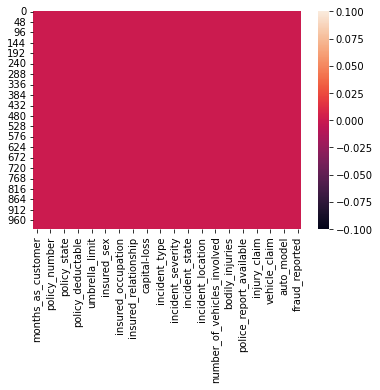

In [58]:
import seaborn as sns
sns.heatmap(df.isnull())

# So there are no null values are present here

Let's drop some columns

In [59]:
df=df.drop(["auto_year"],axis=1)

In [60]:
df=df.drop(["policy_bind_date"],axis=1)

In [61]:
df

months_as_customer  age  policy_number policy_state policy_csl  \
0                   328   48         521585           OH    250/500   
1                   228   42         342868           IN    250/500   
2                   134   29         687698           OH    100/300   
3                   256   41         227811           IL    250/500   
4                   228   44         367455           IL   500/1000   
..                  ...  ...            ...          ...        ...   
995                   3   38         941851           OH   500/1000   
996                 285   41         186934           IL    100/300   
997                 130   34         918516           OH    250/500   
998                 458   62         533940           IL   500/1000   
999                 456   60         556080           OH    250/500   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

    insured_sex  ... bodily_injuries witnesses police_report_available  \
0          MALE  ...               1         2                     YES   
1          MALE  ...               0         0                       ?   
2        FEMALE  ...               2         3                      NO   
3        FEMALE  ...               1         2                      NO   
4          MALE  ...               0         1                      NO   
..          ...  ...             ...       ...                     ...   
995      FEMALE  ...               0         1                       ?   
996      FEMALE  ...               2         3                       ?   
997      FEMALE  ...               2         3                     YES   
998        MALE  ...               0         1                     YES   
999      FEMALE  ...               0         3                       ?   

    total_claim_amount  injury_claim  property_claim vehicle_claim  \
0                71610          6510           13020         52080   
1                 5070           780             780          3510   
2                34650          7700            3850         23100   
3                63400          6340            6340         50720   
4                 6500          1300             650          4550   
..                 ...           ...             ...           ...   
995              87200         17440            8720         61040   
996             108480         18080           18080         72320   
997              67500          7500            7500         52500   
998              46980          5220            5220         36540   
999               5060           460             920          3680   

      auto_make auto_model fraud_reported  
0          Saab        92x              Y  
1      Mercedes       E400              Y  
2         Dodge        RAM              N  
3     Chevrolet      Tahoe              Y  
4        Accura        RSX              N  
..          ...        ...            ...  
995       Honda     Accord              N  
996  Volkswagen     Passat              N  
997      Suburu    Impreza              N  
998        Audi         A5              N  
9

# EDA

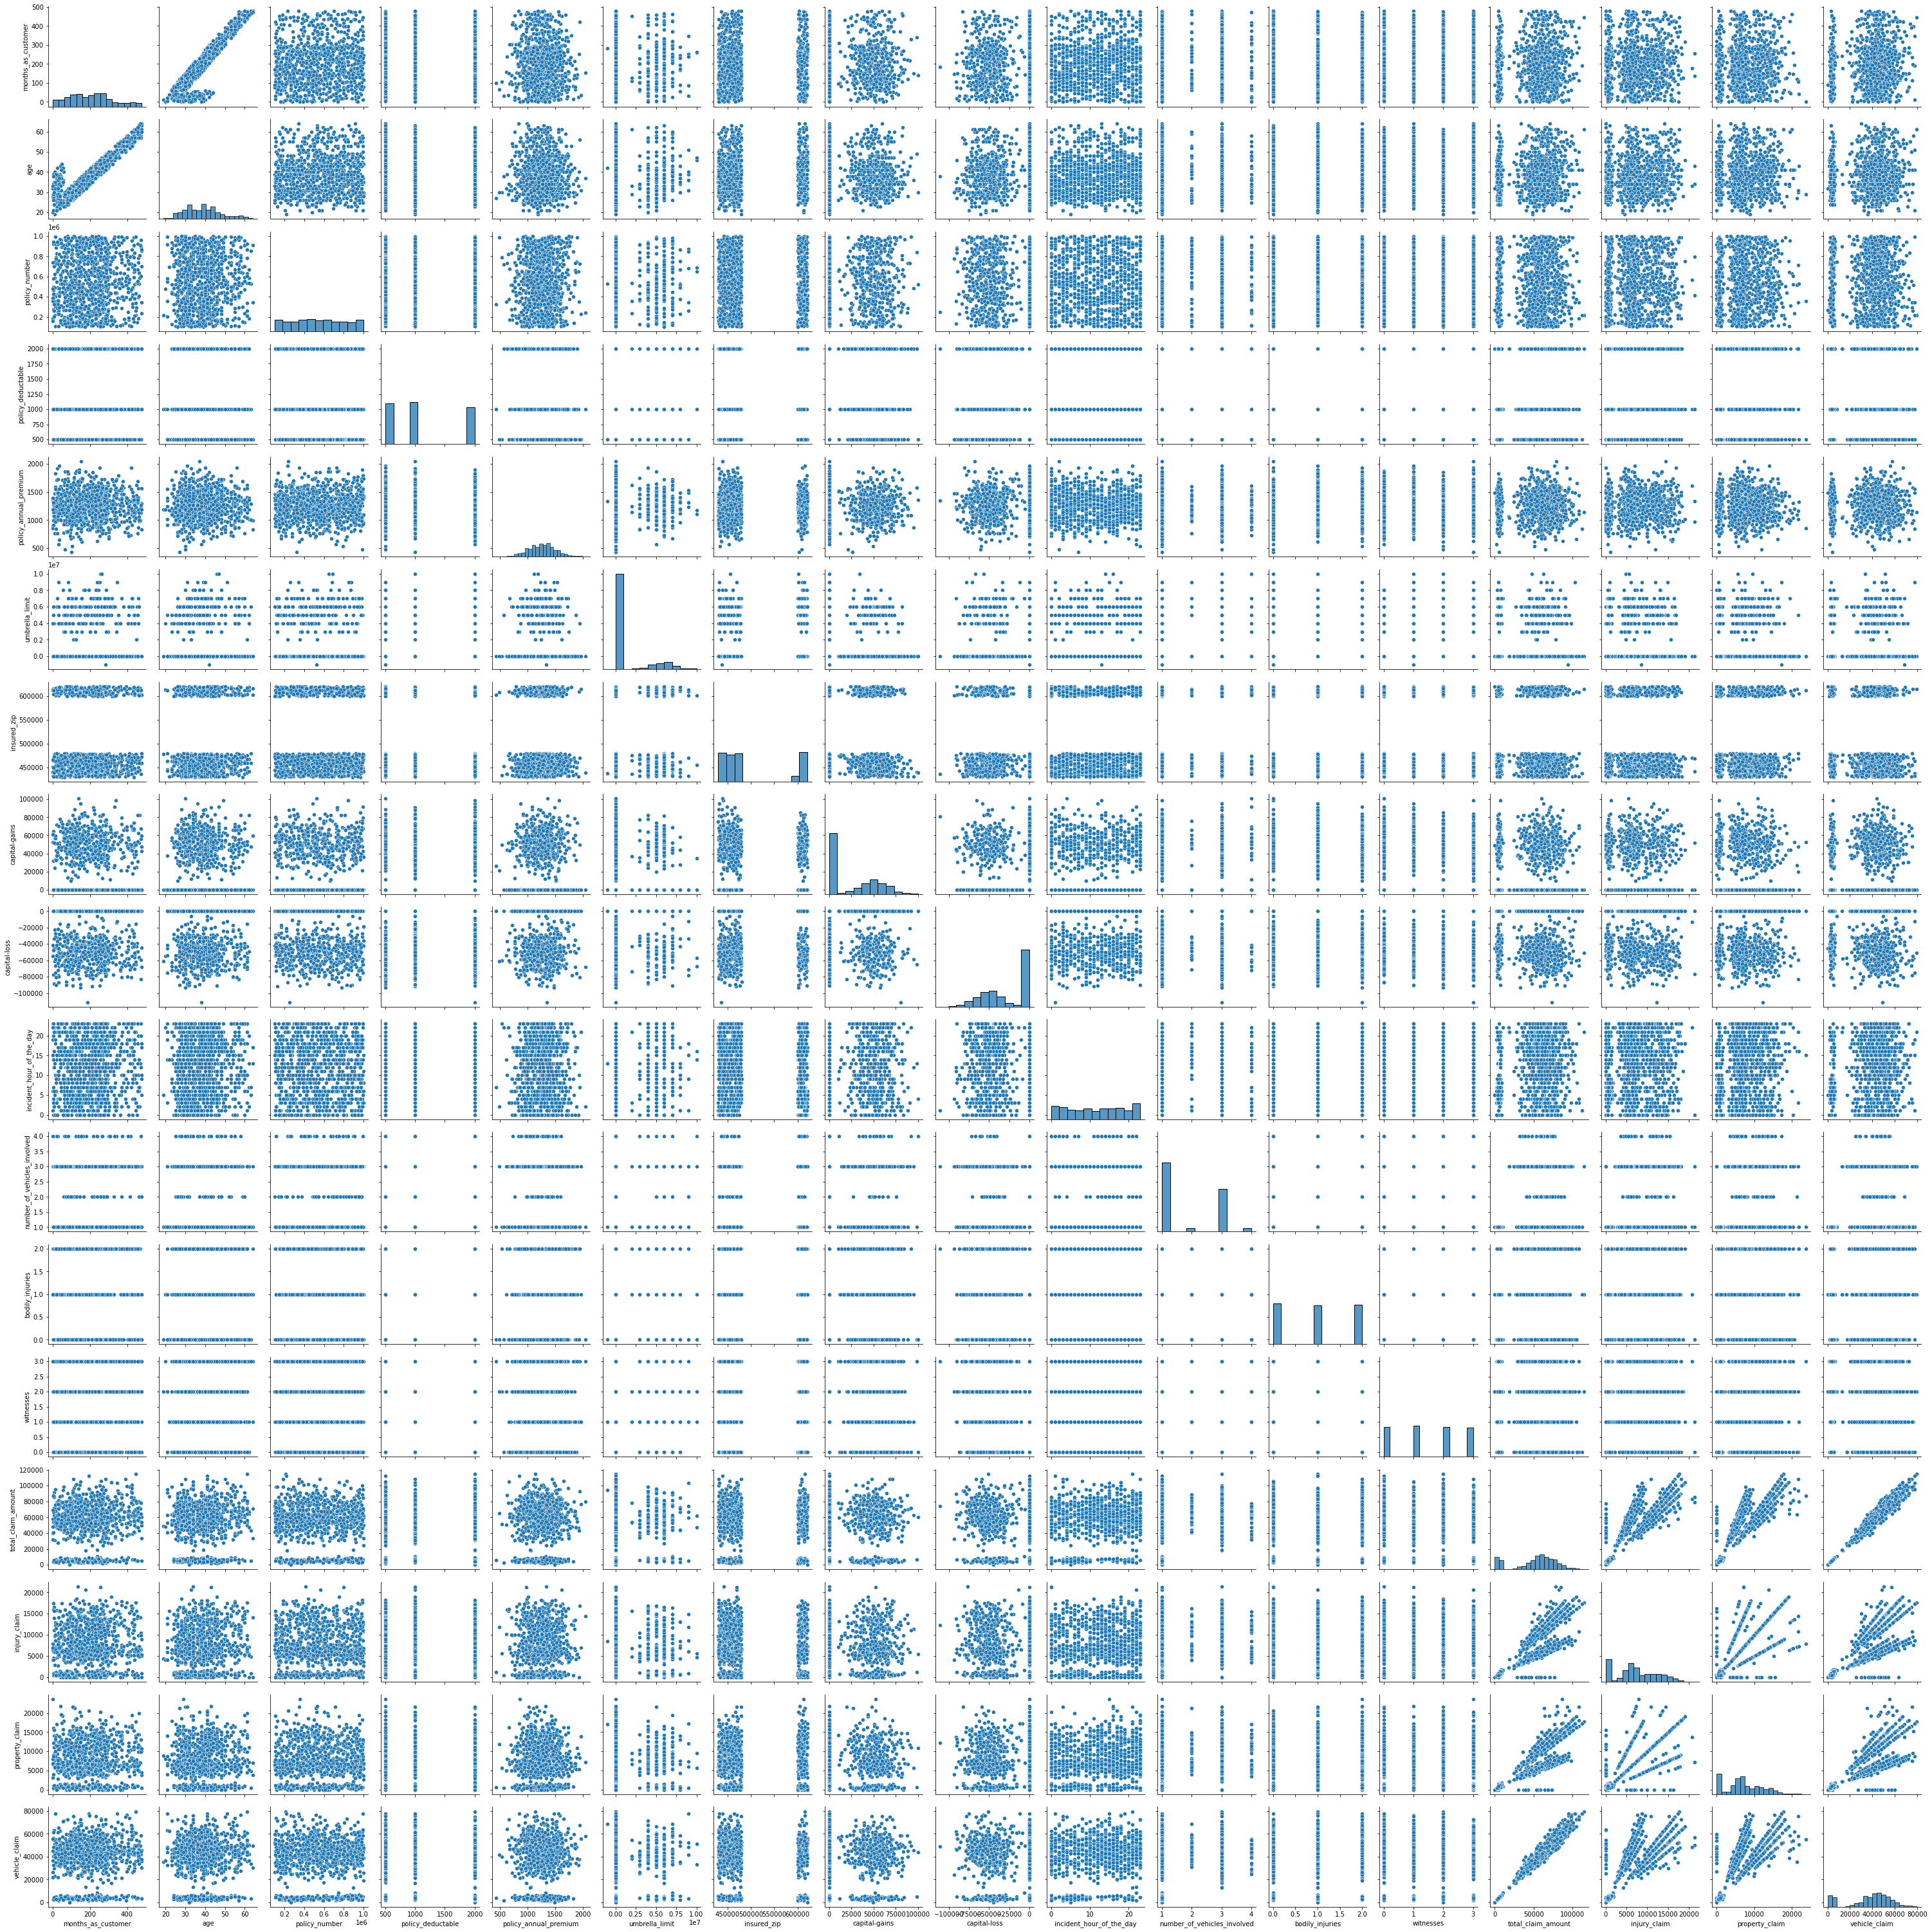

In [62]:
 sns.pairplot(df)

# Count plot

In [63]:
df_visualization_nominal=df[['policy_state','insured_sex','bodily_injuries','witnesses','police_report_available','auto_make','auto_model','fraud_reported']]

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


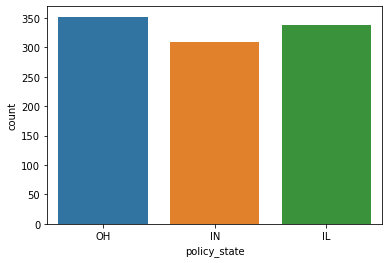

In [64]:
a=sns.countplot(x='policy_state',data=df_visualization_nominal)
print(df_visualization_nominal['policy_state'].value_counts())

observation: here OH    352
IL    338
IN    310

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


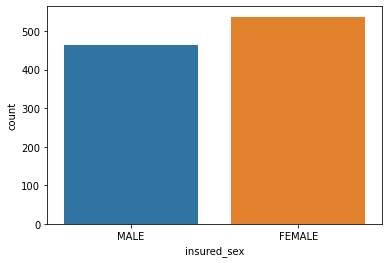

In [65]:
a=sns.countplot(x='insured_sex',data=df_visualization_nominal)
print(df_visualization_nominal['insured_sex'].value_counts())

observation: here FEMALE    537 and
MALE      463

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64


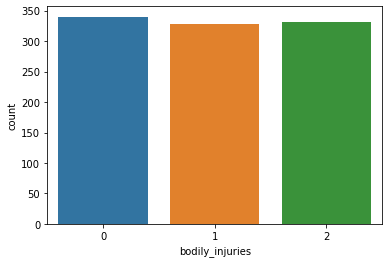

In [66]:
a=sns.countplot(x='bodily_injuries',data=df_visualization_nominal)
print(df_visualization_nominal['bodily_injuries'].value_counts())

observation: here 0    340
2    332
1    328

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


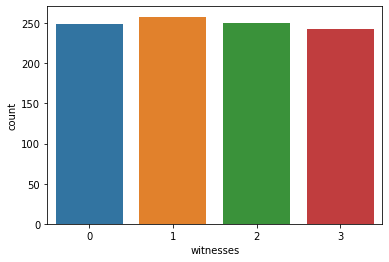

In [67]:
a=sns.countplot(x='witnesses',data=df_visualization_nominal)
print(df_visualization_nominal['witnesses'].value_counts())

observation: here 1    258,
2    250,
0    249,
3    243

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


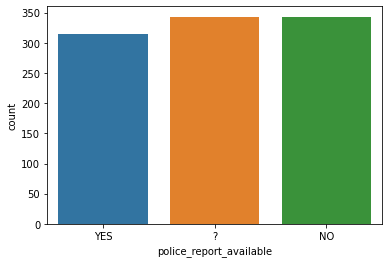

In [68]:
a=sns.countplot(x='police_report_available',data=df_visualization_nominal)
print(df_visualization_nominal['police_report_available'].value_counts())

observation: here ?      343
NO     343
YES    314

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


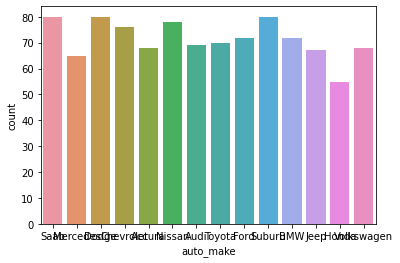

In [69]:
a=sns.countplot(x='auto_make',data=df_visualization_nominal)
print(df_visualization_nominal['auto_make'].value_counts())

observation: here Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


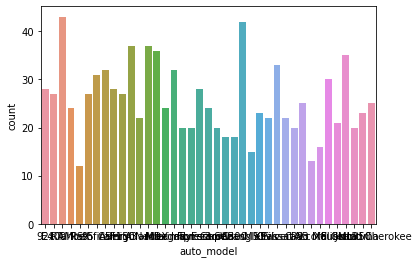

In [70]:
a=sns.countplot(x='auto_model',data=df_visualization_nominal)
print(df_visualization_nominal['auto_model'].value_counts())

observation: here RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12

N    753
Y    247
Name: fraud_reported, dtype: int64


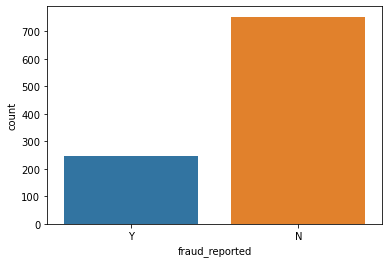

In [71]:
 a=sns.countplot(x='fraud_reported',data=df_visualization_nominal)
print(df_visualization_nominal['fraud_reported'].value_counts())

observation : in the fraud_reported N    753 and
Y    247

# Hist Plot

<AxesSubplot:ylabel='Frequency'>

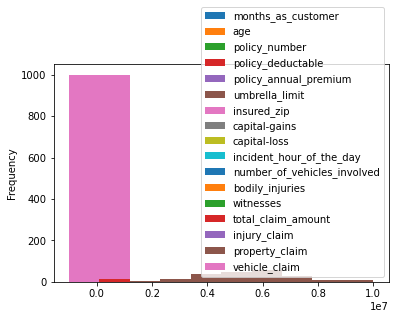

In [72]:
df.plot(kind="hist")

In [73]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

In [74]:
df["fraud_reported"]=Le.fit_transform(df["fraud_reported"])

In [75]:
Le.inverse_transform([0,1])

array(['N', 'Y'], dtype=object)

In [76]:
df["fraud_reported"].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

# Checking the disttribution of the continous value of the float type columns...

In [77]:
df_visualization_continous=df[["policy_annual_premium"]].copy()

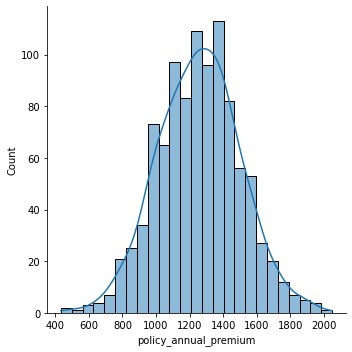

In [78]:
sns.displot(df_visualization_continous["policy_annual_premium"],kde=True)

Data is Normally distributed

# Correlation

In [79]:
df.corr()

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
total_claim_amount                     0.062108  0.069863      -0.018009   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061013  0.062588      -0.020184   
fraud_reported                         0.020544  0.012143      -0.029443   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.026807               0.005018   
age                                   0.029188               0.014404   
policy_number                        -0.006738               0.022566   
policy_deductable                     1.000000              -0.003245   
policy_annual_premium                -0.003245               1.000000   
umbrella_limit                        0.010870              -0.006247   
insured_zip                           0.004545               0.032354   
capital-gains                         0.035212              -0.013738   
capital-loss                         -0.023544               0.023547   
incident_hour_of_the_day              0.060935              -0.001578   
number_of_vehicles_involved           0.051214              -0.045991   
bodily_injuries                      -0.022765               0.026780   
witnesses                             0.066639               0.002332   
total_claim_amount                    0.022839               0.009094   
injury_claim                          0.039107              -0.017633   
property_claim                        0.064792              -0.011654   
vehicle_claim                         0.005269               0.020246   
fraud_reported                        0.014817              -0.014480   

                             umbrella_limit  insured_zip  capital-gains  \
months_as_customer                 0.015498     0.017895       0.006399   
age                                0.018126     0.025604      -0.007075   
policy_number                      0.008968     0.007083       0.009802   
policy_deductable                  0.010870     0.004545       0.035212   
policy_annual_premium             -0.006247     0.032354      -0.013738   
umbrella_limit                     1.000000     0.019671      -0.047268   
insured_zip                        0.019671     1.000000       0.006303   
capital-gains                     -0.047268     0.006303       1.000000   
capital-loss                      -0.024056     0.049372      -0.046904   
incident_hour_of_the_day          -0.023257     0.008274      -0.016406   
number_of_vehicles_involved       -0.021270     0.027448       0.061643   
bodily_injuries                    0.022743     0.028695       0.055829   
witnesses                         -0.006738     0.019805      -0.017651   
total_claim_amount                -0.040344    -0.033873       0.015980   
injury_claim                      -0.045412    -0.017495       0.025934

<AxesSubplot:>

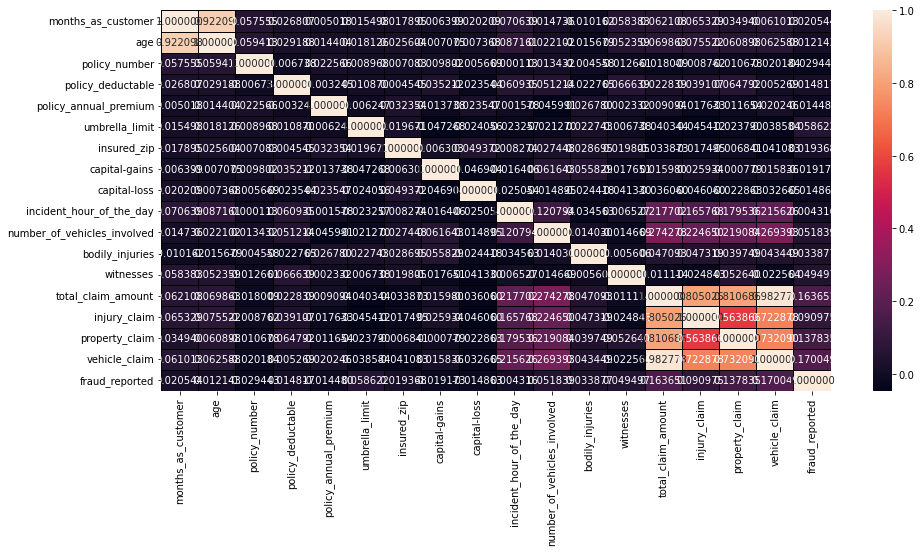

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='2f')

# Observation:--

total_claim_amount and  vehicle_claim are positivly correlated

all are nagetivly correlated

# Descriptions

In [81]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim  fraud_reported  
count     1000.000000    1000.000000     1000.000000  
mean      7399.570000   37928.950000        0.247000  
std       4824.726179   18886.252893        0.431483  
min          0.000000      70.000000        0.000000  
25%       4445.000000   30292.500000        0.000000  
50%       6750.000000   42100.000000        0.000000  
75%      10885.000000   50822.500000        0.000000  
max      23670.000000   79560.000000        1.000000

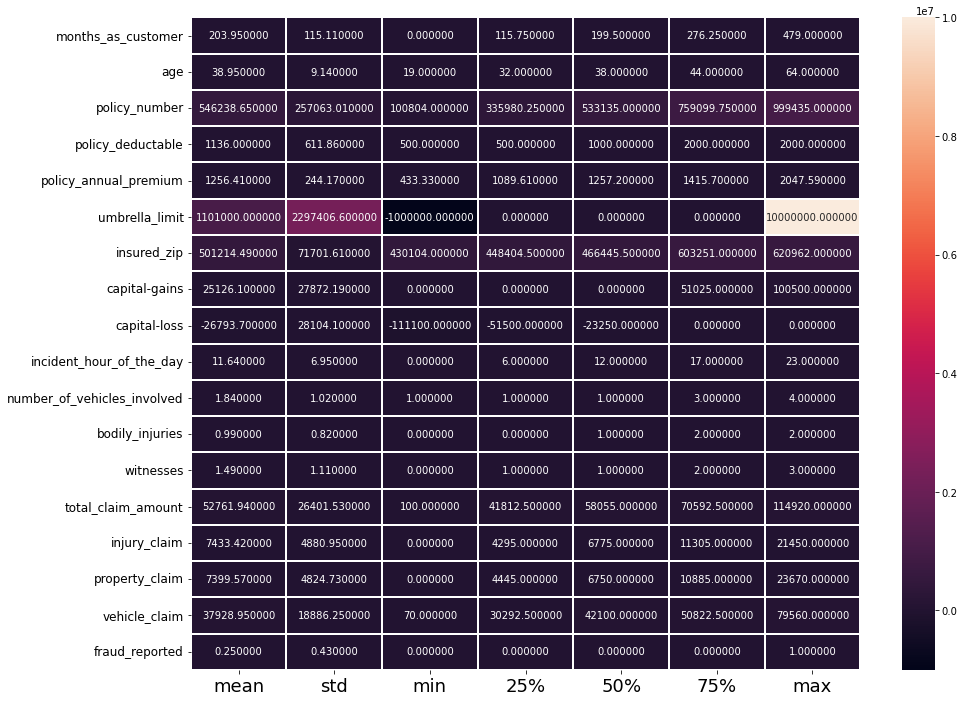

In [82]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12) 
plt.show()

# Outlier checking

In [83]:
from sklearn.preprocessing import LabelEncoder
for column in df:
    if df[column].dtypes == 'object':
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])

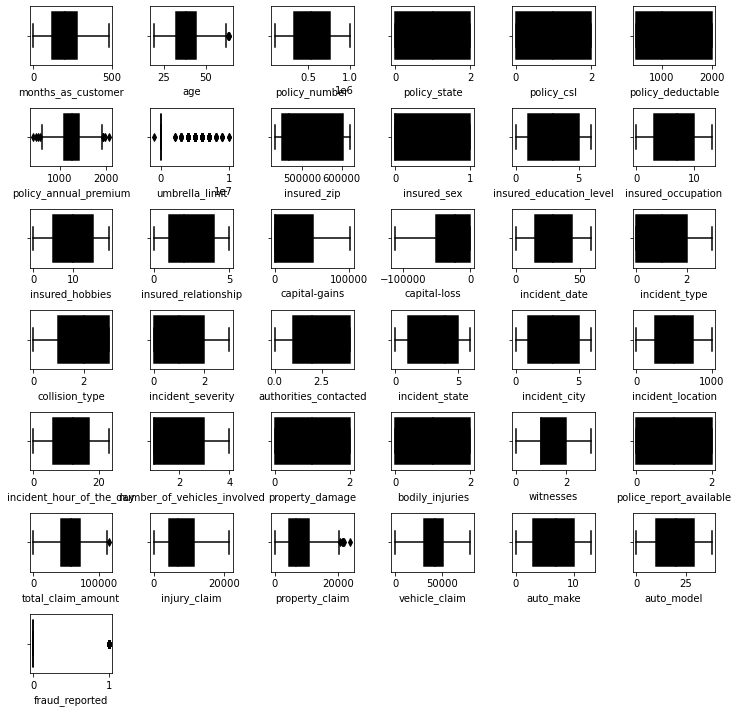

In [84]:
colist=df.columns.values
graph=1
plt.figure(figsize=(10,10))
for i in range(0, len(colist)):
    plt.subplot(7,6,graph)
    sns.boxplot(df[colist[i]],color='black',orient='v')
    graph+=1
    plt.tight_layout()

Some outliers are present

# Removing Outliers

In [85]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(1000, 37)

In [86]:
threshold=3 #rule of thumb
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 7,  7,  7,  7,  7,  6,  6,  7,  7,  7,  7, 32,  7,  7,  7,  6, 15,
        7,  7,  7], dtype=int64))


In [87]:
len(np.where(z>3)[0])

20

In [88]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

months_as_customer  age  policy_number  policy_state  policy_csl  \
0                   328   48         521585             2           1   
1                   228   42         342868             1           1   
2                   134   29         687698             2           0   
3                   256   41         227811             0           1   
4                   228   44         367455             0           2   
..                  ...  ...            ...           ...         ...   
995                   3   38         941851             2           2   
996                 285   41         186934             0           0   
997                 130   34         918516             2           1   
998                 458   62         533940             0           2   
999                 456   60         556080             2           1   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

     insured_sex  ...  bodily_injuries  witnesses  police_report_available  \
0              1  ...                1          2                        2   
1              1  ...                0          0                        0   
2              0  ...                2          3                        1   
3              0  ...                1          2                        1   
4              1  ...                0          1                        1   
..           ...  ...              ...        ...                      ...   
995            0  ...                0          1                        0   
996            0  ...                2          3                        0   
997            0  ...                2          3                        2   
998            1  ...                0          1                        2   
999            0  ...                0          3                        0   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0                 71610          6510           13020          52080   
1                  5070           780             780           3510   
2                 34650          7700            3850          23100   
3                 63400          6340            6340          50720   
4                  6500          1300             650           4550   
..                  ...           ...             ...            ...   
995               87200         17440            8720          61040   
996              108480         18080           18080          72320   
997               67500          7500            7500          52500   
998               46980          5220            5220          36540   
999                5060           460             920           3680   

     auto_make  auto_model  fraud_reported  
0           10           1               1  
1            8          12               1  
2            4          30               0  
3            3          34               1  
4            0          31               0  
..         ...         ...             ...  
995          6           6               0  
996         13          28   

In [89]:
df_new_z.shape

(980, 37)

In [90]:
(1000-980)/1000*100

2.0

2% data has been removed

# Separating the columns into x and y

In [91]:
x=df.drop("fraud_reported",axis=1)
y=df["fraud_reported"]

In [92]:
x

months_as_customer  age  policy_number  policy_state  policy_csl  \
0                   328   48         521585             2           1   
1                   228   42         342868             1           1   
2                   134   29         687698             2           0   
3                   256   41         227811             0           1   
4                   228   44         367455             0           2   
..                  ...  ...            ...           ...         ...   
995                   3   38         941851             2           2   
996                 285   41         186934             0           0   
997                 130   34         918516             2           1   
998                 458   62         533940             0           2   
999                 456   60         556080             2           1   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

     insured_sex  ...  property_damage  bodily_injuries  witnesses  \
0              1  ...                2                1          2   
1              1  ...                0                0          0   
2              0  ...                1                2          3   
3              0  ...                0                1          2   
4              1  ...                1                0          1   
..           ...  ...              ...              ...        ...   
995            0  ...                2                0          1   
996            0  ...                2                2          3   
997            0  ...                0                2          3   
998            1  ...                0                0          1   
999            0  ...                0                0          3   

     police_report_available  total_claim_amount  injury_claim  \
0                          2               71610          6510   
1                          0                5070           780   
2                          1               34650          7700   
3                          1               63400          6340   
4                          1                6500          1300   
..                       ...                 ...           ...   
995                        0               87200         17440   
996                        0              108480         18080   
997                        2               67500          7500   
998                        2               46980          5220   
999                        0                5060           460   

     property_claim  vehicle_claim  auto_make  auto_model  
0             13020          52080         10           1  
1               780           3510          8          12  
2              3850          23100          4          30  
3              6340          50720          3          34  
4               650           4550          0          31  
..              ...            ...        ...         ...  
995            8720          61040          6           6  
996           18080          72320         13          28  
997            75

In [93]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

In [94]:
x.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model'],
      dtype='object')

In [95]:
from sklearn.preprocessing import power_transform

In [96]:
x_new=power_transform(x)

In [97]:
type(x_new)

numpy.ndarray

In [98]:
x.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model'],
      dtype='object')

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [100]:
def calc_vif():
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(vif)

In [101]:
calc_vif()

                      variables  VIF FACTOR
0            months_as_customer   24.409217
1                           age  106.030682
2                 policy_number    5.635784
3                  policy_state    2.563256
4                    policy_csl    2.463974
5             policy_deductable    4.543027
6         policy_annual_premium   26.122432
7                umbrella_limit    1.265967
8                   insured_zip   40.185612
9                   insured_sex    1.909102
10      insured_education_level    3.420258
11           insured_occupation    3.734904
12              insured_hobbies    4.092019
13         insured_relationship    3.174573
14                capital-gains    1.876378
15                 capital-loss    1.979183
16                incident_date    3.994969
17                incident_type    9.322336
18               collision_type    5.917227
19            incident_severity    3.025962
20        authorities_contacted    3.183527
21               incident_state 

We have seen there are multicollinearity present on this 2 columns 'age' and 'insured_zip'

In [102]:
x=df.drop(['insured_zip'],axis=1)

In [103]:
x=df.drop(['age'],axis=1)

In [104]:
x=df.drop(['total_claim_amount'],axis=1)

In [105]:
x=df.drop(['injury_claim'],axis=1)

In [106]:
x=df.drop(['property_claim'],axis=1)

In [107]:
x=df.drop(['vehicle_claim'],axis=1)

In [108]:
x

months_as_customer  age  policy_number  policy_state  policy_csl  \
0                   328   48         521585             2           1   
1                   228   42         342868             1           1   
2                   134   29         687698             2           0   
3                   256   41         227811             0           1   
4                   228   44         367455             0           2   
..                  ...  ...            ...           ...         ...   
995                   3   38         941851             2           2   
996                 285   41         186934             0           0   
997                 130   34         918516             2           1   
998                 458   62         533940             0           2   
999                 456   60         556080             2           1   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

     insured_sex  ...  property_damage  bodily_injuries  witnesses  \
0              1  ...                2                1          2   
1              1  ...                0                0          0   
2              0  ...                1                2          3   
3              0  ...                0                1          2   
4              1  ...                1                0          1   
..           ...  ...              ...              ...        ...   
995            0  ...                2                0          1   
996            0  ...                2                2          3   
997            0  ...                0                2          3   
998            1  ...                0                0          1   
999            0  ...                0                0          3   

     police_report_available  total_claim_amount  injury_claim  \
0                          2               71610          6510   
1                          0                5070           780   
2                          1               34650          7700   
3                          1               63400          6340   
4                          1                6500          1300   
..                       ...                 ...           ...   
995                        0               87200         17440   
996                        0              108480         18080   
997                        2               67500          7500   
998                        2               46980          5220   
999                        0                5060           460   

     property_claim  auto_make  auto_model  fraud_reported  
0             13020         10           1               1  
1               780          8          12               1  
2              3850          4          30               0  
3              6340          3          34               1  
4               650          0          31               0  
..              ...        ...         ...             ...  
995            8720          6           6               0  
996           18080         13          28               0  
997     

# Skewness

In [109]:
sk=x.skew()
sk

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584


In [110]:
sk[np.abs(sk)>0.5].all()

True

In [111]:
sk[np.abs(sk)>0.5].all()

True

In [112]:
x.skew()[np.abs(x.skew())<0.25].all()

False

In [113]:
x=power_transform(x,method='yeo-johnson')

In [114]:
x.skew()[np.abs(x.skew())<0.25].all()

AttributeError: 'numpy.ndarray' object has no attribute 'skew'

Skewness has been removed

In [115]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.05127872,  1.00873272, -0.02315574, ...,  0.85911096,
        -1.80834465,  1.74601919],
       [ 0.30453584,  0.43143333, -0.74529151, ...,  0.41861586,
        -0.58622515,  1.74601919],
       [-0.51122603, -1.13951302,  0.58793118, ..., -0.55514878,
         0.94490524, -0.57273139],
       ...,
       [-0.54970642, -0.47044379,  1.37330822, ...,  1.07113608,
         0.04546316, -0.57273139],
       [ 1.9126537 ,  2.13055434,  0.02397688, ..., -1.44076333,
        -1.30534129, -0.57273139],
       [ 1.90009963,  1.98572613,  0.10769485, ...,  0.41861586,
        -0.58622515, -0.57273139]])

# Since  the data has two varriables the data  is a classification model

# Let's train the data

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [117]:
from sklearn.metrics import classification_report,confusion_matrix

In [118]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("randam state=",i,"The model is performing very wel")
        print("Traning accuracy score is=",i)
        print("Testing accuracy score is=",i)

randam state= 0 The model is performing very wel
Traning accuracy score is= 0
Testing accuracy score is= 0
randam state= 1 The model is performing very wel
Traning accuracy score is= 1
Testing accuracy score is= 1
randam state= 2 The model is performing very wel
Traning accuracy score is= 2
Testing accuracy score is= 2
randam state= 3 The model is performing very wel
Traning accuracy score is= 3
Testing accuracy score is= 3
randam state= 4 The model is performing very wel
Traning accuracy score is= 4
Testing accuracy score is= 4
randam state= 5 The model is performing very wel
Traning accuracy score is= 5
Testing accuracy score is= 5
randam state= 6 The model is performing very wel
Traning accuracy score is= 6
Testing accuracy score is= 6
randam state= 7 The model is performing very wel
Traning accuracy score is= 7
Testing accuracy score is= 7
randam state= 8 The model is performing very wel
Traning accuracy score is= 8
Testing accuracy score is= 8
randam state= 9 The model is performi

randam state= 93 The model is performing very wel
Traning accuracy score is= 93
Testing accuracy score is= 93
randam state= 94 The model is performing very wel
Traning accuracy score is= 94
Testing accuracy score is= 94
randam state= 95 The model is performing very wel
Traning accuracy score is= 95
Testing accuracy score is= 95
randam state= 96 The model is performing very wel
Traning accuracy score is= 96
Testing accuracy score is= 96
randam state= 97 The model is performing very wel
Traning accuracy score is= 97
Testing accuracy score is= 97
randam state= 98 The model is performing very wel
Traning accuracy score is= 98
Testing accuracy score is= 98
randam state= 99 The model is performing very wel
Traning accuracy score is= 99
Testing accuracy score is= 99
randam state= 100 The model is performing very wel
Traning accuracy score is= 100
Testing accuracy score is= 100
randam state= 101 The model is performing very wel
Traning accuracy score is= 101
Testing accuracy score is= 101
rand

randam state= 188 The model is performing very wel
Traning accuracy score is= 188
Testing accuracy score is= 188
randam state= 189 The model is performing very wel
Traning accuracy score is= 189
Testing accuracy score is= 189
randam state= 190 The model is performing very wel
Traning accuracy score is= 190
Testing accuracy score is= 190
randam state= 191 The model is performing very wel
Traning accuracy score is= 191
Testing accuracy score is= 191
randam state= 192 The model is performing very wel
Traning accuracy score is= 192
Testing accuracy score is= 192
randam state= 193 The model is performing very wel
Traning accuracy score is= 193
Testing accuracy score is= 193
randam state= 194 The model is performing very wel
Traning accuracy score is= 194
Testing accuracy score is= 194
randam state= 195 The model is performing very wel
Traning accuracy score is= 195
Testing accuracy score is= 195
randam state= 196 The model is performing very wel
Traning accuracy score is= 196
Testing accura

randam state= 283 The model is performing very wel
Traning accuracy score is= 283
Testing accuracy score is= 283
randam state= 284 The model is performing very wel
Traning accuracy score is= 284
Testing accuracy score is= 284
randam state= 285 The model is performing very wel
Traning accuracy score is= 285
Testing accuracy score is= 285
randam state= 286 The model is performing very wel
Traning accuracy score is= 286
Testing accuracy score is= 286
randam state= 287 The model is performing very wel
Traning accuracy score is= 287
Testing accuracy score is= 287
randam state= 288 The model is performing very wel
Traning accuracy score is= 288
Testing accuracy score is= 288
randam state= 289 The model is performing very wel
Traning accuracy score is= 289
Testing accuracy score is= 289
randam state= 290 The model is performing very wel
Traning accuracy score is= 290
Testing accuracy score is= 290
randam state= 291 The model is performing very wel
Traning accuracy score is= 291
Testing accura

randam state= 379 The model is performing very wel
Traning accuracy score is= 379
Testing accuracy score is= 379
randam state= 380 The model is performing very wel
Traning accuracy score is= 380
Testing accuracy score is= 380
randam state= 381 The model is performing very wel
Traning accuracy score is= 381
Testing accuracy score is= 381
randam state= 382 The model is performing very wel
Traning accuracy score is= 382
Testing accuracy score is= 382
randam state= 383 The model is performing very wel
Traning accuracy score is= 383
Testing accuracy score is= 383
randam state= 384 The model is performing very wel
Traning accuracy score is= 384
Testing accuracy score is= 384
randam state= 385 The model is performing very wel
Traning accuracy score is= 385
Testing accuracy score is= 385
randam state= 386 The model is performing very wel
Traning accuracy score is= 386
Testing accuracy score is= 386
randam state= 387 The model is performing very wel
Traning accuracy score is= 387
Testing accura

randam state= 474 The model is performing very wel
Traning accuracy score is= 474
Testing accuracy score is= 474
randam state= 475 The model is performing very wel
Traning accuracy score is= 475
Testing accuracy score is= 475
randam state= 476 The model is performing very wel
Traning accuracy score is= 476
Testing accuracy score is= 476
randam state= 477 The model is performing very wel
Traning accuracy score is= 477
Testing accuracy score is= 477
randam state= 478 The model is performing very wel
Traning accuracy score is= 478
Testing accuracy score is= 478
randam state= 479 The model is performing very wel
Traning accuracy score is= 479
Testing accuracy score is= 479
randam state= 480 The model is performing very wel
Traning accuracy score is= 480
Testing accuracy score is= 480
randam state= 481 The model is performing very wel
Traning accuracy score is= 481
Testing accuracy score is= 481
randam state= 482 The model is performing very wel
Traning accuracy score is= 482
Testing accura

randam state= 571 The model is performing very wel
Traning accuracy score is= 571
Testing accuracy score is= 571
randam state= 572 The model is performing very wel
Traning accuracy score is= 572
Testing accuracy score is= 572
randam state= 573 The model is performing very wel
Traning accuracy score is= 573
Testing accuracy score is= 573
randam state= 574 The model is performing very wel
Traning accuracy score is= 574
Testing accuracy score is= 574
randam state= 575 The model is performing very wel
Traning accuracy score is= 575
Testing accuracy score is= 575
randam state= 576 The model is performing very wel
Traning accuracy score is= 576
Testing accuracy score is= 576
randam state= 577 The model is performing very wel
Traning accuracy score is= 577
Testing accuracy score is= 577
randam state= 578 The model is performing very wel
Traning accuracy score is= 578
Testing accuracy score is= 578
randam state= 579 The model is performing very wel
Traning accuracy score is= 579
Testing accura

randam state= 665 The model is performing very wel
Traning accuracy score is= 665
Testing accuracy score is= 665
randam state= 666 The model is performing very wel
Traning accuracy score is= 666
Testing accuracy score is= 666
randam state= 667 The model is performing very wel
Traning accuracy score is= 667
Testing accuracy score is= 667
randam state= 668 The model is performing very wel
Traning accuracy score is= 668
Testing accuracy score is= 668
randam state= 669 The model is performing very wel
Traning accuracy score is= 669
Testing accuracy score is= 669
randam state= 670 The model is performing very wel
Traning accuracy score is= 670
Testing accuracy score is= 670
randam state= 671 The model is performing very wel
Traning accuracy score is= 671
Testing accuracy score is= 671
randam state= 672 The model is performing very wel
Traning accuracy score is= 672
Testing accuracy score is= 672
randam state= 673 The model is performing very wel
Traning accuracy score is= 673
Testing accura

randam state= 758 The model is performing very wel
Traning accuracy score is= 758
Testing accuracy score is= 758
randam state= 759 The model is performing very wel
Traning accuracy score is= 759
Testing accuracy score is= 759
randam state= 760 The model is performing very wel
Traning accuracy score is= 760
Testing accuracy score is= 760
randam state= 761 The model is performing very wel
Traning accuracy score is= 761
Testing accuracy score is= 761
randam state= 762 The model is performing very wel
Traning accuracy score is= 762
Testing accuracy score is= 762
randam state= 763 The model is performing very wel
Traning accuracy score is= 763
Testing accuracy score is= 763
randam state= 764 The model is performing very wel
Traning accuracy score is= 764
Testing accuracy score is= 764
randam state= 765 The model is performing very wel
Traning accuracy score is= 765
Testing accuracy score is= 765
randam state= 766 The model is performing very wel
Traning accuracy score is= 766
Testing accura

randam state= 853 The model is performing very wel
Traning accuracy score is= 853
Testing accuracy score is= 853
randam state= 854 The model is performing very wel
Traning accuracy score is= 854
Testing accuracy score is= 854
randam state= 855 The model is performing very wel
Traning accuracy score is= 855
Testing accuracy score is= 855
randam state= 856 The model is performing very wel
Traning accuracy score is= 856
Testing accuracy score is= 856
randam state= 857 The model is performing very wel
Traning accuracy score is= 857
Testing accuracy score is= 857
randam state= 858 The model is performing very wel
Traning accuracy score is= 858
Testing accuracy score is= 858
randam state= 859 The model is performing very wel
Traning accuracy score is= 859
Testing accuracy score is= 859
randam state= 860 The model is performing very wel
Traning accuracy score is= 860
Testing accuracy score is= 860
randam state= 861 The model is performing very wel
Traning accuracy score is= 861
Testing accura

randam state= 950 The model is performing very wel
Traning accuracy score is= 950
Testing accuracy score is= 950
randam state= 951 The model is performing very wel
Traning accuracy score is= 951
Testing accuracy score is= 951
randam state= 952 The model is performing very wel
Traning accuracy score is= 952
Testing accuracy score is= 952
randam state= 953 The model is performing very wel
Traning accuracy score is= 953
Testing accuracy score is= 953
randam state= 954 The model is performing very wel
Traning accuracy score is= 954
Testing accuracy score is= 954
randam state= 955 The model is performing very wel
Traning accuracy score is= 955
Testing accuracy score is= 955
randam state= 956 The model is performing very wel
Traning accuracy score is= 956
Testing accuracy score is= 956
randam state= 957 The model is performing very wel
Traning accuracy score is= 957
Testing accuracy score is= 957
randam state= 958 The model is performing very wel
Traning accuracy score is= 958
Testing accura

In [119]:
print(classification_report(y_test,pred_test))
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00        51

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

1.0
[[149   0]
 [  0  51]]


Here accuracy_score is 1.0 and here true positive and true nagetive rate is 149 and 51

# RandamForestClassifier

In [120]:
 from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 100.0
[[149   0]
 [  0  51]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00        51

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Here accuracy_score is 100 and here true positive and true nagetive rate is 149 and 51

# KNeighborsClassifier

In [121]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
preknn=knn.predict(x_test)
print(accuracy_score(y_test,preknn))
print(confusion_matrix(y_test,preknn))
print(classification_report(y_test,preknn))

0.89
[[149   0]
 [ 22  29]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       149
           1       1.00      0.57      0.72        51

    accuracy                           0.89       200
   macro avg       0.94      0.78      0.83       200
weighted avg       0.90      0.89      0.88       200



Here accuracy_score is .89 and here true positive and true nagetive rate is 149 and 29

# SVC

In [122]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 100.0
[[149   0]
 [  0  51]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00        51

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Here accuracy_score is 100 and here true positive and true nagetive rate is 149 and 51

In [123]:
#Let's check cv ...and see model is overfitted or not
from sklearn.model_selection import cross_val_score

# SVC

In [124]:
scr1=cross_val_score(svc,x,y,cv=5)
print("CV score for SVC Model:",scr1.mean())

CV score for SVC Model: 1.0


# RandomForestClassifier

In [125]:
scr=cross_val_score(rf,x,y,cv=5)
print("CV score for Random Forest Model:",scr.mean())


CV score for Random Forest Model: 1.0


# Logistic

In [126]:
scr2=cross_val_score(lr,x,y,cv=5)
print("CV score for Logistic Model:",scr2.mean())

CV score for Logistic Model: 1.0


Cv for RandomForestClassifier

# KNeighborsClassifier

In [127]:
scr3=cross_val_score(knn,x,y,cv=5)
print("CV score for KNN Model:",scr3.mean())

CV score for KNN Model: 0.9259999999999999


In [128]:
lsscore_selected=cross_val_score(lr,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",scr)

The cv score is:- 1.0 
The accuracy score is:- [1. 1. 1. 1. 1.]


CV for SVC

In [129]:
lsscore_selected=cross_val_score(svc,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",scr)

The cv score is:- 1.0 
The accuracy score is:- [1. 1. 1. 1. 1.]


CV for LR

In [130]:
lsscore_selected=cross_val_score(lr,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",scr2)

The cv score is:- 1.0 
The accuracy score is:- [1. 1. 1. 1. 1.]


In [131]:
lsscore_selected=cross_val_score(lr,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",scr2)

The cv score is:- 1.0 
The accuracy score is:- [1. 1. 1. 1. 1.]


CV for knn

In [132]:
lsscore_selected=cross_val_score(lr,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",scr3)

The cv score is:- 1.0 
The accuracy score is:- [0.92  0.935 0.93  0.94  0.905]


So, CV and accuracy_score is same...for 3 models...

Sp Let's takae RandomForestClassifier for Grid search cv

# HYPERMETER TUNNING¶

In [133]:
RandomForestClassifier()

RandomForestClassifier()

In [134]:
from sklearn.model_selection import GridSearchCV

In [135]:
parameters={"max_features":['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}

In [136]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto'}

In [137]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [138]:
GCV.best_estimator_

RandomForestClassifier(max_depth=5)

In [139]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

1.0

# AUC ROC

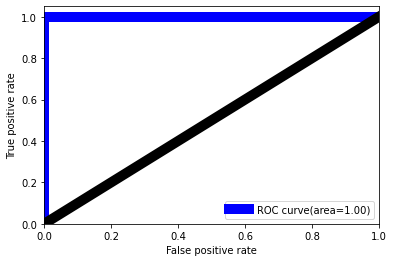

In [140]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,pred_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='BLUE',lw=10,label='ROC curve(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='black',lw=10,linestyle='-')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

# MODEL IS PERFORMINING 99.99% WELL.....

# Model saving

In [141]:
import pickle
filename='Insurance Claims 2.pkl'
pickle.dump(rf,open(filename,'wb'))

In [142]:
loaded_model=pickle.load(open('Insurance Claims 2.pkl','rb'))
results=loaded_model.score(x_test,y_test)

In [143]:
results

1.0

# conclusion

In [144]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_test[:]],index=['Predicted','Orginal'])
conclusion

0    1    2    3    4    5    6    7    8    9    ...  190  191  \
Predicted    0    0    0    1    0    0    0    1    0    0  ...    0    1   
Orginal      0    0    0    1    0    0    0    1    0    0  ...    0    1   

           192  193  194  195  196  197  198  199  
Predicted    0    0    0    1    0    0    1    0  
Orginal      0    0    0    1    0    0    1    0  

[2 rows x 200 columns]